In [1]:
import pandas as pd
import regex as re
import matplotlib.pyplot as plt


In [2]:
# Reading the datasets that are useful for this task

follow_up_df = pd.read_csv(r"C:\Users\PC\Daniel Chen Dropbox\Alexis Malca\Peru_Justice\02_Data\08_CEJ_Web\data_cleaned\DF_follow_up_cleaner_2018.csv", error_bad_lines=False)
df_downloads = pd.read_csv(r"C:\Users\PC\Daniel Chen Dropbox\Alexis Malca\Peru_Justice\02_Data\08_CEJ_Web\data_cleaned\DF_DOWNLOADS_2018.csv", low_memory=False)

C:\Users\PC\AppData\Local\Temp\ipykernel_3152\3984583681.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  follow_up_df = pd.read_csv(r"C:\Users\PC\Daniel Chen Dropbox\Alexis Malca\Peru_Justice\02_Data\08_CEJ_Web\data_cleaned\DF_follow_up_cleaner_2018.csv", error_bad_lines=False)
Skipping line 147793: expected 10 fields, saw 18

Skipping line 403502: expected 10 fields, saw 14
Skipping line 403503: expected 10 fields, saw 13
Skipping line 406865: expected 10 fields, saw 19
Skipping line 411463: expected 10 fields, saw 19
Skipping line 417503: expected 10 fields, saw 21
Skipping line 424997: expected 10 fields, saw 16
Skipping line 426098: expected 10 fields, saw 11
Skipping line 426296: expected 10 fields, saw 12
Skipping line 432261: expected 10 fields, saw 13
Skipping line 433084: expected 10 fields, saw 12
Skipping line 436799: expected 10 fields, saw 16

Skipping line 556892: expected 1

In [75]:
df_downloads

,expediente_num,num,text,error,file_path,link
0,00001-2018-0-0201-JP-CI-02,6,\n Corte Superior de Justic...,NaN,data/2018/downloaded_files/00001-2018-0-0201-J...,documentoD.html?nid=UhGaVIlKXobSwTzhrK
1,00001-2018-0-0201-JP-CI-02,9,"\n Huaraz, 16...",NaN,data/2018/downloaded_files/00001-2018-0-0201-J...,documentoD.html?nid=MwZSONFSFLZNTSMUNXlS
2,00001-2018-0-0201-JP-CI-02,16,\n2° JUZGADO PAZ LETRADO - Sede Central\nEXPED...,NaN,data/2018/downloaded_files/00001-2018-0-0201-J...,documentoD.html?nid=wPQtqYiDZwvcucvOv
3,00001-2018-0-0201-JP-CI-02,17,\n\n2° JUZGADO PAZ LETRADO - Sede Central\nEXP...,NaN,data/2018/downloaded_files/00001-2018-0-0201-J...,documentoD.html?nid=MDinAekCuARZtYC
4,00001-2018-0-0201-JP-CI-02,18,\n\n2° JUZGADO PAZ LETRADO - Sede Central\nEXP...,NaN,data/2018/downloaded_files/00001-2018-0-0201-J...,documentoD.html?nid=UaYEPJPJCwEzubhDucus
...,...,...,...,...,...,...
985365,00001-2018-1-3301-SP-LA-01,1,: 00001-2018-1-3301-SP-LA-01 \n: QUEJA DE DERE...,NaN,data/2018/downloaded_files/00001-2018-1-3301-S...,documentoD.html?nid=plXYcGwKqMvavwzvSpiI
985366,00001-2018-1-3301-SP-LA-01,3,\n\nCORTE SUPERIOR DE JUSTICIA DE VENTANILLA ...,NaN,data/2018/downloaded_files/00001-2018-1-3301-S...,documentoD.html?nid=ksGfhNxGiZvZrYYae
985367,00001-2018-1-3301-SP-LA-01,4,\n\n \n\nIlustre Corte Superior de \n\nJusti...,NaN,data/2018/downloaded_files/00001-2018-1-3301-S...,documentoD.html?nid=vqyztkCijSEniYVaReF
985368,00001-2018-1-3301-SP-LA-01,5,\n\nCORTE SUPERIOR DE JUSTICIA DE VENTANILLA ...,NaN,data/2018/downloaded_files/00001-2018-1-3301-S...,documentoD.html?nid=WSiCFfOXyIaQCLtDTks


In [76]:
follow_up_df

,Expediente N°:,link,Fecha de Resolución/Ingreso:,Resolución:,Tipo de Notificación:,Acto:,Fojas/Folios:,Proveido:,Sumilla:,Descripción de Usuario:
0,00001-2018-0-0201-JP-CI-02,documentoD.html?nid=LRyCGgwXtSvPzXJHvVHJ,22/02/2021,CATORCE,Pta. Cedula Not.,DECRETO,1.0,22/02/2021,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tTÉNGASE POR ...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...
1,00001-2018-0-0201-JP-CI-02,NaN,11/02/2021 10:05,NaN,NaN,NOTA,NaN,11/02/2021,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tEL EXPEDIENT...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tINGRESADO PO...
2,00001-2018-0-0201-JP-CI-02,documentoD.html?nid=QDZWktRZbXuTmWDTKBCO,20/01/2021,OFICIO,NaN,OFICIO,1.0,20/01/2021,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tOFICIO DEVOL...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...
3,00001-2018-0-0201-JP-CI-02,documentoD.html?nid=FwXRolLumnCYTIEsbom,13/11/2020,OCHO,Pta. Cedula Not.,DECRETO,1.0,13/11/2020,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tESTANDO A LA...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...
4,00001-2018-0-0201-JP-CI-02,documentoD.html?nid=UhGaVIlKXobSwTzhrK,10/03/2020,INFORME ORAL,NaN,INFORME ORAL,1.0,10/03/2020,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tINFORME ORAL...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...
...,...,...,...,...,...,...,...,...,...,...
1785020,00001-2018-1-3301-SP-LA-01,documentoD.html?nid=plXYcGwKqMvavwzvSpiI,22/11/2018,CINCO,Pta. Cedula Not.,AUTO,1.0,27/11/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tVISTA LA RAZ...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...
1785021,00001-2018-1-3301-SP-LA-01,NaN,21/11/2018 14:40,NaN,NaN,NOTA,NaN,21/11/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tEN MERITO A ...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tINGRESADO PO...
1785022,00001-2018-1-3301-SP-LA-01,documentoD.html?nid=ksGfhNxGiZvZrYYae,05/11/2018,CUATRO,Pta. Cedula Not.,AUTO,1.0,05/11/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t1°)\tCORREGI...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...
1785023,00001-2018-1-3301-SP-LA-01,documentoD.html?nid=WSiCFfOXyIaQCLtDTks,03/10/2018,DOS,Pta. Cedula Not.,AUTO,1.0,03/10/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tAUTOS VISTOS...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...


In [34]:
# Merge the dataframes on the 'link' column. I use the link column because it works like an ID. 
merged_df = pd.merge(follow_up_df, df_downloads, on='link', how='inner')
# Count the number of coincidences
coincidence_count = len(merged_df)
print(f'Number of coincidences: {coincidence_count}')

Number of coincidences: 972706


In [35]:
merged_df.drop_duplicates(subset=['link'], keep='first', inplace=True)
def clean_text(x):
    if isinstance(x, str):
        return x.replace('\n', ' ').replace('\x0c', '')
    else:
        return ''

merged_df['text'] = merged_df['text'].apply(clean_text)
merged_df['text'] = merged_df['text'].apply(lambda x: re.sub(r'\s+', ' ', str(x)))

In [36]:
# Let's count how many case files we have in the dataset
expediente_counts = merged_df['Expediente N°:'].value_counts()
total_unique_files = expediente_counts.shape[0]
print("Total unique case files:", total_unique_files)

Total unique case files: 135933


## Introducing Peruvian Procedural Law concepts

Our mission is filter the data so we can get only final decisions, which means a decisions issued by a judge that finish the process.

According to the Peruvian Procedural Law, we have three types of judicial resolutions: Decreto (Decree), Auto (Order), and Sentencia (Judgement).

See the following articles of the Peruvian Procedural Law:

"Article 120.- Resolutions
The procedural acts through which the progress or resolution within the process is initiated or concluded may be decrees, orders, and judgments.

Article 121.- Decrees, Orders, and Judgments
Decrees propel the development of the process, ordering procedural acts of a simple nature.

Through orders, the Judge resolves the admissibility or rejection of the complaint or counterclaim, the sanitation, interruption, conclusion, and special forms of conclusion of the process; the granting or denial of appeals, the admission, inadmissibility, or modification of precautionary measures, and other decisions that require motivation for their pronouncement.

Through the judgment, the Judge concludes the instance or the process definitively, expressing a clear, precise, and motivated decision on the disputed issue, declaring the rights of the parties, or exceptionally addressing the validity of the procedural relationship.

It's most likely to get a final decision under the judgement type. For Autos, that could end the process, we must have another approach. 

In [37]:
class_counts = merged_df['Acto:'].value_counts()
class_counts

DECRETO                                                        378649
AUTO                                                           185690
AUTO ADMISORIO                                                  85063
AUTO FINAL                                                      38188
SENTENCIA                                                       37852
                                                                ...  
AUTO FUNDADA QUEJA                                                  1
AUTO DE NULIDAD                                                     1
AMPLIACION DE SENTENCIA                                             1
AUTO FUNDADA EXCEPCION FALTA LEGITIMIDAD PARA OBRAR DEL DTE         1
DENUNCIA                                                            1
Name: Acto:, Length: 288, dtype: int64

## 1. First step of the filter

In this task, we only keep the rows that contains a word related to "Sentencia". 

Once we do this, we will take out from the merged_df the casefiles we found a "Sentencia" decision. 

The reason behind it, is that we want to keep only the cases that have been decided by the Court, and not the ones that could be still pending.

Then, we will run another code wit frequent expressions asocciated to final decisions to be sure that we are not missing any casefile with a final decision.

In [66]:
sentencia_df = merged_df[merged_df['Acto:'].str.contains('SENTENCIA', case=False, na=False)]

In [67]:
sentencia_counts = sentencia_df['Acto:'].value_counts()
sentencia_counts

SENTENCIA                                                 37852
AUTO Q DECLARA CONSENTIDA LA SENTENCIA                    13097
SENTENCIA DE VISTA                                         9740
SENTENCIA FUNDADA                                           939
SENTENCIA FUNDADA EN PARTE                                  654
SENTENCIA INFUNDADA                                         606
AUTO QUE DECLARA CONSENTIDA SENTENCIA                       396
PUESTA A DESPACHO PARA SENTENCIA                            389
SENTENCIA DE VISTA QUE CONFIRMA (A EJECUCION)               338
SENTENCIA FUNDADA LA DEMANDA                                204
SENTENCIA IMPROCEDENTE                                       89
SENTENCIA DE VISTA QUE CONFIRMA (A ARCHIVO)                  61
AUTO QUE DECLARA CONSENTIDA LA SENTENCIA/AUTO DE VISTA       59
SENTENCIA DE VISTA QUE ANULA (A TRAMITE)                     54
SENTENCIA DE VISTA QUE REVOCA (A EJECUCION)                  35
RESOLUCION DE TRAIGASE PARA SENTENCIAR  

In [68]:
# There are many Orders (Autos) that are related to Judgements. Let's delete them from the dataset.

keywords = ['AUTO', 'PUESTA A DESPACHO PARA SENTENCIA', 'RESOLUCION DE TRAIGASE PARA SENTENCIAR', 'APELACION DE SENTENCIA', 'EJECUCION DE SENTENCIA', 'AMPLIACION DE SENTENCIA']

sentencia_df = sentencia_df[~sentencia_df['Acto:'].str.contains('|'.join(keywords), case=False, na=False)]
sentencia_df

,Expediente N°:,link,Fecha de Resolución/Ingreso:,Resolución:,Tipo de Notificación:,Acto:,Fojas/Folios:,Proveido:,Sumilla:,Descripción de Usuario:,expediente_num,num,text,error,file_path
9,00001-2018-0-0201-JP-CI-02,documentoD.html?nid=mQuQTmBLXPYnUnDRFeF,10/03/2020,SIETE,Pta. Cedula Not.,SENTENCIA DE VISTA,3.0,10/03/2020,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tI.\tDECLARAR...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00001-2018-0-0201-JP-CI-02,5,Corte Superior de Justicia de Ancash PRIMER JU...,NaN,data/2018/downloaded_files/00001-2018-0-0201-J...
13,00001-2018-0-0201-JP-CI-02,documentoD.html?nid=oDkOPdslwqDgHyefLv,24/05/2019,RESOLUCIÓN # 06,Pta. Cedula Not.,SENTENCIA,5.0,24/05/2019,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tSENTENCIA: I...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00001-2018-0-0201-JP-CI-02,12,2° JUZGADO PAZ LETRADO - Sede Central EXPEDIE...,NaN,data/2018/downloaded_files/00001-2018-0-0201-J...
249,00002-2018-0-0201-JP-FC-02,documentoD.html?nid=IHlZsUeXRVbYJpF,05/09/2018,CINCO,Pta. Cedula Not.,SENTENCIA,4.0,05/09/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tSENTENCIA FU...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00002-2018-0-0201-JP-FC-02,31,2° JUZGADO PAZ LETRADO - Sede Central EXPEDIE...,NaN,data/2018/downloaded_files/00002-2018-0-0201-J...
263,00002-2018-0-0201-JP-FC-02,documentoD.html?nid=iDZigZDNXRMYqQCbd,22/01/2019,DOCE,Pta. Cedula Not.,SENTENCIA DE VISTA,5.0,22/01/2019,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tSE RESUELVE:...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00002-2018-0-0201-JP-FC-02,23,1° JUZGADO FAMILIA - Sede Central EXPEDIENTE M...,NaN,data/2018/downloaded_files/00002-2018-0-0201-J...
328,00006-2018-0-0210-JP-FC-01,documentoD.html?nid=GoktBpGEdOROVEm,02/08/2021,TRECE,Pta. Cedula Not.,SENTENCIA,7.0,24/08/2021,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDECISIÓN:\nP...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00006-2018-0-0210-JP-FC-01,1,JUZGADO DE PAZ LETRADO - Sede Pomabamba EXPEDI...,NaN,data/2018/downloaded_files/00006-2018-0-0210-J...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972636,00031-2018-0-3301-SP-CI-01,documentoD.html?nid=eGEnDljJkMSqLlKA,04/04/2019,SEIS,Pta. Cedula Not.,SENTENCIA,13.0,05/04/2019,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tFALLA: 1)\tD...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00031-2018-0-3301-SP-CI-01,2,EXPEDIENTE RELATOR MATERIA DEMANDANTE DEMANDA...,NaN,data/2018/downloaded_files/00031-2018-0-3301-S...
972658,00035-2018-0-3301-SP-CI-01,documentoD.html?nid=YMsaKAxIeZtjjjaio,12/03/2019,SEIS,Pta. Cedula Not.,SENTENCIA,9.0,21/03/2019,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tFALLA: 1)\tD...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00035-2018-0-3301-SP-CI-01,4,EXPEDIENTE MATERIA RELATOR DEMANDADO DEMANDAN...,NaN,data/2018/downloaded_files/00035-2018-0-3301-S...
972675,00004-2018-0-3301-SP-FC-01,documentoD.html?nid=EARPtgTIWzAOtFpEWW,20/07/2018,TRES,Pta. Cedula Not.,SENTENCIA DE VISTA,5.0,20/07/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t1.\tDECLARAN...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00004-2018-0-3301-SP-FC-01,2,CORTE SUPERIOR DE JUSTICIA DE VENTANILLA SALA...,NaN,data/2018/downloaded_files/00004-2018-0-3301-S...
972679,00005-2018-0-3301-SP-FC-01,documentoD.html?nid=eIfLYIiqfylreNpGWu,04/03/2020,ONCE,Pta. Cedula Not.,SENTENCIA,4.0,05/03/2020,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t1.\tDECLARAN...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00005-2018-0-3301-SP-FC-01,2,CORTE SUPERIOR DE JUSTICIA DE VENTANILLA Y PUE...,NaN,data/2018/downloaded_files/00005-2018-0-3301-S...


In [69]:
sentencia_counts = sentencia_df['Acto:'].value_counts()
sentencia_counts

SENTENCIA                                        37852
SENTENCIA DE VISTA                                9740
SENTENCIA FUNDADA                                  939
SENTENCIA FUNDADA EN PARTE                         654
SENTENCIA INFUNDADA                                606
SENTENCIA DE VISTA QUE CONFIRMA (A EJECUCION)      338
SENTENCIA FUNDADA LA DEMANDA                       204
SENTENCIA IMPROCEDENTE                              89
SENTENCIA DE VISTA QUE CONFIRMA (A ARCHIVO)         61
SENTENCIA DE VISTA QUE ANULA (A TRAMITE)            54
SENTENCIA DE VISTA QUE REVOCA (A EJECUCION)         35
SENTENCIA INFUNDADA LA DEMANDA                      18
SENTENCIA DE VISTA QUE REVOCA (A ARCHIVO)           16
SENTENCIA DE VISTA QUE ANULA (A EJECUCION)           2
Name: Acto:, dtype: int64

In [70]:
expediente_counts = sentencia_df['Expediente N°:'].value_counts()
expediente_counts

00401-2018-0-2802-JR-LA-01    10
00442-2018-0-2802-JP-LA-03     7
00160-2018-0-3102-JP-LA-01     6
00176-2018-0-2802-JR-LA-01     6
00547-2018-0-2801-JR-LA-01     6
                              ..
00002-2018-0-1502-JM-CI-01     1
00001-2018-0-1502-JM-CI-01     1
00332-2018-0-1501-JR-LA-03     1
00327-2018-0-1506-JR-LA-01     1
00007-2018-0-3301-SP-FC-01     1
Name: Expediente N°:, Length: 40880, dtype: int64

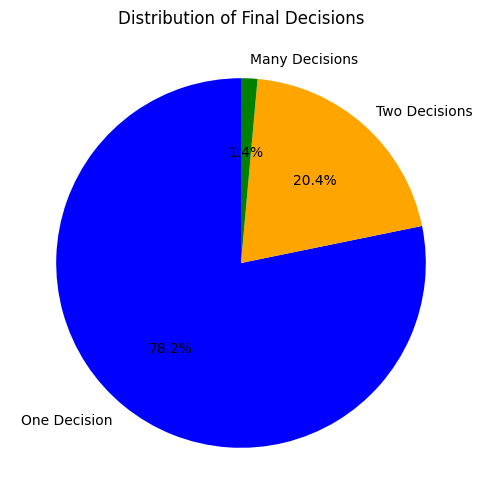

In [71]:
# Create three subsets based on the specified criteria
single_observation = expediente_counts[expediente_counts == 1]
second_observations = expediente_counts[expediente_counts == 2]
third_observations = expediente_counts[(expediente_counts >= 3) & (expediente_counts <= 10)]

total_count = len(expediente_counts)
single_percentage = len(single_observation) / total_count * 100
second_percentage = len(second_observations) / total_count * 100
third_percentage = len(third_observations) / total_count * 100

# Plotting
plt.figure(figsize=(10, 6))

labels = ['One Decision', 'Two Decisions', 'Many Decisions']
sizes = [single_percentage, second_percentage, third_percentage]
colors = ['blue', 'orange', 'green']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Final Decisions')

plt.show()

In [72]:
# Creating a dataset with files than contains only one final decision
unique_expedientes = expediente_counts[expediente_counts == 1].index
one_fd = sentencia_df[sentencia_df['Expediente N°:'].isin(unique_expedientes)]
one_fd

,Expediente N°:,link,Fecha de Resolución/Ingreso:,Resolución:,Tipo de Notificación:,Acto:,Fojas/Folios:,Proveido:,Sumilla:,Descripción de Usuario:,expediente_num,num,text,error,file_path
328,00006-2018-0-0210-JP-FC-01,documentoD.html?nid=GoktBpGEdOROVEm,02/08/2021,TRECE,Pta. Cedula Not.,SENTENCIA,7.0,24/08/2021,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDECISIÓN:\nP...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00006-2018-0-0210-JP-FC-01,1,JUZGADO DE PAZ LETRADO - Sede Pomabamba EXPEDI...,NaN,data/2018/downloaded_files/00006-2018-0-0210-J...
346,00006-2018-0-0215-JP-FC-01,documentoD.html?nid=JduMwGNHzBYHcRxVouD,12/08/2021,VEINTIOCHO,NaN,SENTENCIA,9.0,25/08/2021,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tFALLA: DECLA...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00006-2018-0-0215-JP-FC-01,2,JUZGADO DE PAZ LETRADO ITINERANTE-Sede Asunció...,NaN,data/2018/downloaded_files/00006-2018-0-0215-J...
360,00007-2018-0-0201-JP-FC-02,documentoD.html?nid=yyHFwZbLpJQIWNYQJ,30/10/2020,DIECISIETE,Pta. Cedula Not.,SENTENCIA,10.0,30/10/2020,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tFALLA:\n\n1....,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00007-2018-0-0201-JP-FC-02,7,CORTE SUPERIOR DE JUSTICIA DE ANCASH TERCER JU...,NaN,data/2018/downloaded_files/00007-2018-0-0201-J...
393,00008-2018-0-0201-JP-FC-01,documentoD.html?nid=IEsgCKwvAcFQGWpZh,29/10/2019,ONCE,Pta. Cedula Not.,SENTENCIA,7.0,29/10/2019,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tSENTENCIAS\n...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00008-2018-0-0201-JP-FC-01,6,CORTE SUPERIOR DE JUSTICIA DE ANCASH TERCER J...,NaN,data/2018/downloaded_files/00008-2018-0-0201-J...
431,00010-2018-0-0212-JP-FC-01,documentoD.html?nid=bueEHGtWIISyzFwDq,14/04/2021,VEINTIUNO,Pta. Cedula Not.,SENTENCIA DE VISTA,5.0,30/04/2021,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tSE RESUELVE:...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00010-2018-0-0212-JP-FC-01,3,JUZGADO MIXTO - Sede Sihuas EXPEDIENTE MATERIA...,NaN,data/2018/downloaded_files/00010-2018-0-0212-J...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972636,00031-2018-0-3301-SP-CI-01,documentoD.html?nid=eGEnDljJkMSqLlKA,04/04/2019,SEIS,Pta. Cedula Not.,SENTENCIA,13.0,05/04/2019,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tFALLA: 1)\tD...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00031-2018-0-3301-SP-CI-01,2,EXPEDIENTE RELATOR MATERIA DEMANDANTE DEMANDA...,NaN,data/2018/downloaded_files/00031-2018-0-3301-S...
972658,00035-2018-0-3301-SP-CI-01,documentoD.html?nid=YMsaKAxIeZtjjjaio,12/03/2019,SEIS,Pta. Cedula Not.,SENTENCIA,9.0,21/03/2019,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tFALLA: 1)\tD...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00035-2018-0-3301-SP-CI-01,4,EXPEDIENTE MATERIA RELATOR DEMANDADO DEMANDAN...,NaN,data/2018/downloaded_files/00035-2018-0-3301-S...
972675,00004-2018-0-3301-SP-FC-01,documentoD.html?nid=EARPtgTIWzAOtFpEWW,20/07/2018,TRES,Pta. Cedula Not.,SENTENCIA DE VISTA,5.0,20/07/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t1.\tDECLARAN...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00004-2018-0-3301-SP-FC-01,2,CORTE SUPERIOR DE JUSTICIA DE VENTANILLA SALA...,NaN,data/2018/downloaded_files/00004-2018-0-3301-S...
972679,00005-2018-0-3301-SP-FC-01,documentoD.html?nid=eIfLYIiqfylreNpGWu,04/03/2020,ONCE,Pta. Cedula Not.,SENTENCIA,4.0,05/03/2020,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t1.\tDECLARAN...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00005-2018-0-3301-SP-FC-01,2,CORTE SUPERIOR DE JUSTICIA DE VENTANILLA Y PUE...,NaN,data/2018/downloaded_files/00005-2018-0-3301-S...


In [73]:
sentencia_prueba = sentencia_df.copy()

In [74]:
# Improving the keyword approach 

# Function to determine decision based on the third half of the text
def determine_decision(text):
   # len_text = len(str(text))
   #third_last_part_start = 2 * len_text // 3
   #third_last_part = str(text)[third_last_part_start:]
   
   if any(keyword.lower() in text.lower() for keyword in keywords):
        return 'Possible F_Decision'
   
   else:
        return 'Pre-step Decision'

keywords = ['declarese','RESUELVE:','se resuelve:', 'decide:', 'falla:', 'fallo:',
            'PARTE RESOLUTIVA', 'RESUELVEN:', 'fundada la solicitud',
            'declárese:', 'resuelve:', 'decisión:',
            'archivar el presente proceso', 'rechazándose la demanda', 
            'archívese', 'archivese', 'reformandola', 'fundada en parte la demanda', 'infundada la demanda', 
            'fundada la demanda', 'improcedente la demanda']

sentencia_prueba['Decision'] = sentencia_prueba['text'].apply(determine_decision)

decisions_counts = sentencia_prueba['Decision'].value_counts()
decisions_counts

Possible F_Decision    49411
Pre-step Decision       1197
Name: Decision, dtype: int64

In [61]:
# Analyzing the decisions classified as a pre-step and no text

sentencia_prueba_1 = sentencia_prueba.loc[~sentencia_prueba['Decision'].str.contains('Possible F_Decision', case=False)]
sentencia_prueba_1

,Expediente N°:,link,Fecha de Resolución/Ingreso:,Resolución:,Tipo de Notificación:,Acto:,Fojas/Folios:,Proveido:,Sumilla:,Descripción de Usuario:,expediente_num,num,text,error,file_path,Decision
12027,00005-2018-62-0201-SP-CI-01,documentoD.html?nid=CsVJVBlGwuqjWDF,05/03/2018,TRES,Pta. Cedula Not.,SENTENCIA DE VISTA,3.0,15/03/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDECLARARON I...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00005-2018-62-0201-SP-CI-01,4,1° SALA CIVIL - Sede Central RELATOR : LEONCIO...,NaN,data/2018/downloaded_files/00005-2018-62-0201-...,Pre-step Decision
18912,00112-2018-0-0401-JP-CI-02,documentoD.html?nid=dYdlEswtURFWoAsKQsqV,27/08/2021,SENTENCIA.,Pta. Cedula Not.,SENTENCIA,7.0,27/08/2021,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tSENTENCIA Nº...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00112-2018-0-0401-JP-CI-02,1,2º JUZGADO DE PAZ LETRADO - CIVIL EXPEDIENTE :...,NaN,data/2018/downloaded_files/00112-2018-0-0401-J...,Pre-step Decision
19219,00126-2018-0-0404-JP-CI-01,documentoD.html?nid=cfFDTPvjrYuNKAJAxcH,24/04/2019,TRES,Pta. Cedula Not.,SENTENCIA,2.0,25/04/2019,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDECLARO LA S...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00126-2018-0-0404-JP-CI-01,2,JUZGADO DE PAZ LETRADO - Sede Aplao EXPEDIENT...,NaN,data/2018/downloaded_files/00126-2018-0-0404-J...,Pre-step Decision
20177,00183-2018-0-0401-JP-CI-02,documentoD.html?nid=REzptttyDJTzuUnDaCX,15/06/2020,DIECIOCHO,Pta. Cedula Not.,SENTENCIA DE VISTA,3.0,23/06/2020,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tSE RESUELVE:...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00183-2018-0-0401-JP-CI-02,4,: 00183-2018-0-0401-JP-CI-02 : OBLIGACION DE D...,NaN,data/2018/downloaded_files/00183-2018-0-0401-J...,Pre-step Decision
20405,00195-2018-0-0402-JP-CI-01,documentoD.html?nid=yWRPLbdddBzuEAidkHE,31/07/2019,QUINCE,Pta. Cedula Not.,SENTENCIA,1.0,31/07/2019,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tSENTENCIA\n\...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00195-2018-0-0402-JP-CI-01,11,CORTE SUPERIOR DE AREQUIPA Secretario: EDUARDO...,NaN,data/2018/downloaded_files/00195-2018-0-0402-J...,Pre-step Decision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967656,00138-2018-0-3301-JR-CI-03,documentoD.html?nid=cdFBrSUUfGpyfDLQxsKU,15/10/2019,VEINTISIETE,Pta. Cedula Not.,PUESTA A DESPACHO PARA SENTENCIA,1.0,15/10/2019,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDADO CUENTA ...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00138-2018-0-3301-JR-CI-03,20,CORTE SUPERIOR DE JUSTICIA DE VENTANILLA Terce...,NaN,data/2018/downloaded_files/00138-2018-0-3301-J...,Pre-step Decision
967839,00148-2018-0-3301-JR-CI-03,documentoD.html?nid=pcnaHSuLDPZVyMgcwn,19/07/2019,VEINTIDOS,Pta. Cedula Not.,PUESTA A DESPACHO PARA SENTENCIA,2.0,19/07/2019,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tCOMUNÍQUESE ...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00148-2018-0-3301-JR-CI-03,14,______________________________________________...,NaN,data/2018/downloaded_files/00148-2018-0-3301-J...,Pre-step Decision
968014,00157-2018-0-3301-JR-CI-01,documentoD.html?nid=BTIbAgJQPwPaNUj,07/01/2020,DOCE,Pta. Cedula Not.,PUESTA A DESPACHO PARA SENTENCIA,1.0,07/01/2020,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDEJENSE LOS ...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00157-2018-0-3301-JR-CI-01,27,: 00157-2018-0-3301-JR-CI-01 : MEJOR DERECHO ...,NaN,data/2018/downloaded_files/00157-2018-0-3301-J...,Pre-step Decision
968020,00157-2018-0-3301-JR-CI-01,documentoD.html?nid=fhywbNCGqMgYuoGdU,13/09/2021,TREINTA Y SEIS,NaN,SENTENCIA DE VISTA,17.0,15/09/2021,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tCONFIRMA SEN...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00157-2018-0-3301-JR-CI-01,1,: 00157-2018-0-3301-JR-CI-01 : EXHORTO : ALVA...,NaN,data/2018/downloaded_files/00157-2018-0-3301-J...,Pre-step Decision


In [65]:
selected_block = sentencia_prueba_1.iloc[1542,12]
selected_block

' : 00157-2018-0-3301-JR-CI-01 : MEJOR DERECHO A LA POSESION : MORENO CCANCCE RICARDO JONNY : SACCSA CANGALAYA, MARIO : HIDALGO HERNANDEZ, DOLLYBETH CAROLINA JACINTO MAYLLE, NOEMI ERNISTINA 1° JUZGADO CIVIL - SEDE ANEXO 1 EXPEDIENTE MATERIA JUEZ ESPECIALISTA DEMANDADO DEMANDANTE : JACINTO YUPANQUI, DONATA VICTORIA RESOLUCIÓN NÚMERO Ventanilla, veintiséis de diciembre Del año dos mil diecinueve.- DANDO CUENTA a escrito número 7040 - 2019 de DOLLYBETH CAROLINA HIDALFO HERNANDEZ: Al principal y otrosí: TÉNGASE PRESENTE LA DESIGNACIÓN DE SU DOMICILIO PROCESAL FISICO (SERNOT) Y ELECTRONICO (SINOE), LUGAR DONDE SE LE ENVIARAN LAS NOTIFICACIONES DE LAS RESOLUCIONES QUE RECAIGAN EN AUTOS; Y, TENGASE PRESENTE LO EXPUESTO AL MOMENTO DE SENTENCIAR. DEJANDOSE LOS AUTOS EN EL DESPACHO PARA SENTENCIAR. DANDO CUENTA a escrito número 7153- 2019 de NOEMI ERNESTINA JACINTO MAYLLE: Al principal y otrosí: TÉNGASE PRESENTE LO EXPUESTO AL MOMENTO DE SENTENCIAR. DEJANDOSE LOS AUTOS EN EL DESPACHO PARA SENTEN

## Second Step of the Filter. (on going)

We will assume that the case files above are closed (we have 40,880). We will do the following:

1. Remove the closed case files from the merged_df.
2. Exclude the Decrees (Decreto) since there is a low chance they contain a final decision.
3. Run an algorithm using the most common expressions to identify any missing final decisions.

In [36]:
second_filter_df = pd.merge(merged_df, sentencia_df[['Expediente N°:']], on='Expediente N°:', how='left', indicator=True).query('_merge == "left_only"').drop('_merge', axis=1)
second_filter_df

,Expediente N°:,link,Fecha de Resolución/Ingreso:,Resolución:,Tipo de Notificación:,Acto:,Fojas/Folios:,Proveido:,Sumilla:,Descripción de Usuario:,expediente_num,num,text,error,file_path
36,00002-2018-0-0201-JP-CI-01,documentoD.html?nid=ZsCzhXqVuoNnPOkOdN,03/09/2018,DOS,Pta. Cedula Not.,AUTO QUE RECHAZA LA DEMANDA,1.0,04/09/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tSE RESUELVE:...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00002-2018-0-0201-JP-CI-01,2,\n\n: 00002-2018-0-0201-JP-CI-01 \n: OBLIGACI...,NaN,data/2018/downloaded_files/00002-2018-0-0201-J...
37,00002-2018-0-0201-JP-CI-01,documentoD.html?nid=gnJKAMDFTuWCuaF,24/12/2019,TRES,Pta. Cedula Not.,AUTO,1.0,06/01/2020,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tSE RESUELVE:...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00002-2018-0-0201-JP-CI-01,1,\n\n: 00002-2018-0-0201-JP-CI-01 \n: OBLIGACI...,NaN,data/2018/downloaded_files/00002-2018-0-0201-J...
38,00002-2018-0-0201-JP-CI-01,documentoD.html?nid=lcHrdEBAQJHRJmu,18/01/2018,UNO,Pta. Cedula Not.,AUTO INADMISIBLE,1.0,18/01/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tINADMISIBLE ...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00002-2018-0-0201-JP-CI-01,3,1° JUZGADO PAZ LETRADO - Sede Central \nEXPEDI...,NaN,data/2018/downloaded_files/00002-2018-0-0201-J...
39,00003-2018-0-0201-JP-CI-02,documentoD.html?nid=rQKIOAXdNTmpOaNAtqJs,31/03/2021,SEIS,Pta. Cedula Not.,AUTO,1.0,31/03/2021,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tSE RESUELVE:...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00003-2018-0-0201-JP-CI-02,1,\n\n2° JUZGADO PAZ LETRADO - Sede Central \n ...,NaN,data/2018/downloaded_files/00003-2018-0-0201-J...
40,00003-2018-0-0201-JP-CI-02,documentoD.html?nid=bPrbkArBnvfpZWYkslY,21/08/2019,CUATRO,Pta. Cedula Not.,DECRETO,1.0,27/08/2019,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDADO CUENTA:...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00003-2018-0-0201-JP-CI-02,3,\n\n \n2° JUZGADO PAZ LETRADO - Sede Central ...,NaN,data/2018/downloaded_files/00003-2018-0-0201-J...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195294,00001-2018-1-3301-SP-LA-01,documentoD.html?nid=vqyztkCijSEniYVaReF,17/10/2018,TRES,Pta. Cedula Not.,AUTO,8.0,29/10/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tRESUELVE: ...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00001-2018-1-3301-SP-LA-01,4,\n\n \n\nIlustre Corte Superior de \n\nJusti...,NaN,data/2018/downloaded_files/00001-2018-1-3301-S...
1195295,00001-2018-1-3301-SP-LA-01,documentoD.html?nid=plXYcGwKqMvavwzvSpiI,22/11/2018,CINCO,Pta. Cedula Not.,AUTO,1.0,27/11/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tVISTA LA RAZ...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00001-2018-1-3301-SP-LA-01,1,: 00001-2018-1-3301-SP-LA-01 \n: QUEJA DE DERE...,NaN,data/2018/downloaded_files/00001-2018-1-3301-S...
1195296,00001-2018-1-3301-SP-LA-01,documentoD.html?nid=ksGfhNxGiZvZrYYae,05/11/2018,CUATRO,Pta. Cedula Not.,AUTO,1.0,05/11/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t1°)\tCORREGI...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00001-2018-1-3301-SP-LA-01,3,\n\nCORTE SUPERIOR DE JUSTICIA DE VENTANILLA ...,NaN,data/2018/downloaded_files/00001-2018-1-3301-S...
1195297,00001-2018-1-3301-SP-LA-01,documentoD.html?nid=WSiCFfOXyIaQCLtDTks,03/10/2018,DOS,Pta. Cedula Not.,AUTO,1.0,03/10/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tAUTOS VISTOS...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00001-2018-1-3301-SP-LA-01,5,\n\nCORTE SUPERIOR DE JUSTICIA DE VENTANILLA ...,NaN,data/2018/downloaded_files/00001-2018-1-3301-S...


In [37]:
# Let's count how many case files we have

expediente_counts = second_filter_df['Expediente N°:'].value_counts()
expediente_counts

00071-2018-0-1401-JR-CI-01     66
00865-2018-0-1815-JP-FC-06     60
00080-2018-0-3301-JR-CI-03     60
00065-2018-0-2802-JM-CI-01     58
01000-2018-0-1815-JP-FC-06     57
                               ..
00035-2018-33-1801-SP-CI-06     1
00414-2018-0-1411-JR-FC-02      1
00001-2018-0-2603-JM-FC-01      1
00030-2018-78-1601-JP-FC-02     1
00114-2018-0-1801-JP-FC-09      1
Name: Expediente N°:, Length: 91134, dtype: int64

In [38]:
# Let's run the second step of the algorithm
second_filter_df = second_filter_df.loc[~second_filter_df['Acto:'].str.contains('DECRETO', case=False)]
second_filter_df

,Expediente N°:,link,Fecha de Resolución/Ingreso:,Resolución:,Tipo de Notificación:,Acto:,Fojas/Folios:,Proveido:,Sumilla:,Descripción de Usuario:,expediente_num,num,text,error,file_path
36,00002-2018-0-0201-JP-CI-01,documentoD.html?nid=ZsCzhXqVuoNnPOkOdN,03/09/2018,DOS,Pta. Cedula Not.,AUTO QUE RECHAZA LA DEMANDA,1.0,04/09/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tSE RESUELVE:...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00002-2018-0-0201-JP-CI-01,2,\n\n: 00002-2018-0-0201-JP-CI-01 \n: OBLIGACI...,NaN,data/2018/downloaded_files/00002-2018-0-0201-J...
37,00002-2018-0-0201-JP-CI-01,documentoD.html?nid=gnJKAMDFTuWCuaF,24/12/2019,TRES,Pta. Cedula Not.,AUTO,1.0,06/01/2020,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tSE RESUELVE:...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00002-2018-0-0201-JP-CI-01,1,\n\n: 00002-2018-0-0201-JP-CI-01 \n: OBLIGACI...,NaN,data/2018/downloaded_files/00002-2018-0-0201-J...
38,00002-2018-0-0201-JP-CI-01,documentoD.html?nid=lcHrdEBAQJHRJmu,18/01/2018,UNO,Pta. Cedula Not.,AUTO INADMISIBLE,1.0,18/01/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tINADMISIBLE ...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00002-2018-0-0201-JP-CI-01,3,1° JUZGADO PAZ LETRADO - Sede Central \nEXPEDI...,NaN,data/2018/downloaded_files/00002-2018-0-0201-J...
39,00003-2018-0-0201-JP-CI-02,documentoD.html?nid=rQKIOAXdNTmpOaNAtqJs,31/03/2021,SEIS,Pta. Cedula Not.,AUTO,1.0,31/03/2021,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tSE RESUELVE:...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00003-2018-0-0201-JP-CI-02,1,\n\n2° JUZGADO PAZ LETRADO - Sede Central \n ...,NaN,data/2018/downloaded_files/00003-2018-0-0201-J...
43,00003-2018-0-0201-JP-CI-02,documentoD.html?nid=nIIFTCYTUOlwrLVgT,05/03/2018,UNO,Pta. Cedula Not.,AUTO ADMISORIO,1.0,05/03/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tADMITASE A I...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00003-2018-0-0201-JP-CI-02,6,\n\n2° JUZGADO PAZ LETRADO - Sede Central\nEXP...,NaN,data/2018/downloaded_files/00003-2018-0-0201-J...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195294,00001-2018-1-3301-SP-LA-01,documentoD.html?nid=vqyztkCijSEniYVaReF,17/10/2018,TRES,Pta. Cedula Not.,AUTO,8.0,29/10/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tRESUELVE: ...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00001-2018-1-3301-SP-LA-01,4,\n\n \n\nIlustre Corte Superior de \n\nJusti...,NaN,data/2018/downloaded_files/00001-2018-1-3301-S...
1195295,00001-2018-1-3301-SP-LA-01,documentoD.html?nid=plXYcGwKqMvavwzvSpiI,22/11/2018,CINCO,Pta. Cedula Not.,AUTO,1.0,27/11/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tVISTA LA RAZ...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00001-2018-1-3301-SP-LA-01,1,: 00001-2018-1-3301-SP-LA-01 \n: QUEJA DE DERE...,NaN,data/2018/downloaded_files/00001-2018-1-3301-S...
1195296,00001-2018-1-3301-SP-LA-01,documentoD.html?nid=ksGfhNxGiZvZrYYae,05/11/2018,CUATRO,Pta. Cedula Not.,AUTO,1.0,05/11/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t1°)\tCORREGI...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00001-2018-1-3301-SP-LA-01,3,\n\nCORTE SUPERIOR DE JUSTICIA DE VENTANILLA ...,NaN,data/2018/downloaded_files/00001-2018-1-3301-S...
1195297,00001-2018-1-3301-SP-LA-01,documentoD.html?nid=WSiCFfOXyIaQCLtDTks,03/10/2018,DOS,Pta. Cedula Not.,AUTO,1.0,03/10/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tAUTOS VISTOS...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00001-2018-1-3301-SP-LA-01,5,\n\nCORTE SUPERIOR DE JUSTICIA DE VENTANILLA ...,NaN,data/2018/downloaded_files/00001-2018-1-3301-S...


In [39]:
prueba_df = second_filter_df.copy()

In [43]:
# Let's run the third step of the algorithm 

# Function to determine decision based on the third half of the text
def determine_decision(text):
   if pd.isna(text):  # Check if the text is NaN
        return 'No Text'
   
   len_text = len(str(text))
   third_last_part_start = 2 * len_text // 3
   third_last_part = str(text)[third_last_part_start:]
   
   if any(keyword.lower() in third_last_part.lower() for keyword in keywords):
        return 'Possible F_Decision'
   
   else:
        return 'Pre-step Decision'

keywords = ['se resuelve:', 'decide:', 'falla:', 'fallo:',
            'archivar el presente proceso', 'rechazándose la demanda', 
            'archívese', 'archivese', 'reformandola', 'fundada en parte la demanda', 'infundada la demanda', 
            'fundada la demanda', 'improcedente la demanda']

prueba_df['Decision'] = prueba_df['text'].apply(determine_decision)


In [44]:
prueba_df

,Expediente N°:,link,Fecha de Resolución/Ingreso:,Resolución:,Tipo de Notificación:,Acto:,Fojas/Folios:,Proveido:,Sumilla:,Descripción de Usuario:,expediente_num,num,text,error,file_path,Decision
36,00002-2018-0-0201-JP-CI-01,documentoD.html?nid=ZsCzhXqVuoNnPOkOdN,03/09/2018,DOS,Pta. Cedula Not.,AUTO QUE RECHAZA LA DEMANDA,1.0,04/09/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tSE RESUELVE:...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00002-2018-0-0201-JP-CI-01,2,\n\n: 00002-2018-0-0201-JP-CI-01 \n: OBLIGACI...,NaN,data/2018/downloaded_files/00002-2018-0-0201-J...,Possible F_Decision
37,00002-2018-0-0201-JP-CI-01,documentoD.html?nid=gnJKAMDFTuWCuaF,24/12/2019,TRES,Pta. Cedula Not.,AUTO,1.0,06/01/2020,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tSE RESUELVE:...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00002-2018-0-0201-JP-CI-01,1,\n\n: 00002-2018-0-0201-JP-CI-01 \n: OBLIGACI...,NaN,data/2018/downloaded_files/00002-2018-0-0201-J...,Pre-step Decision
38,00002-2018-0-0201-JP-CI-01,documentoD.html?nid=lcHrdEBAQJHRJmu,18/01/2018,UNO,Pta. Cedula Not.,AUTO INADMISIBLE,1.0,18/01/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tINADMISIBLE ...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00002-2018-0-0201-JP-CI-01,3,1° JUZGADO PAZ LETRADO - Sede Central \nEXPEDI...,NaN,data/2018/downloaded_files/00002-2018-0-0201-J...,Pre-step Decision
39,00003-2018-0-0201-JP-CI-02,documentoD.html?nid=rQKIOAXdNTmpOaNAtqJs,31/03/2021,SEIS,Pta. Cedula Not.,AUTO,1.0,31/03/2021,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tSE RESUELVE:...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00003-2018-0-0201-JP-CI-02,1,\n\n2° JUZGADO PAZ LETRADO - Sede Central \n ...,NaN,data/2018/downloaded_files/00003-2018-0-0201-J...,Possible F_Decision
43,00003-2018-0-0201-JP-CI-02,documentoD.html?nid=nIIFTCYTUOlwrLVgT,05/03/2018,UNO,Pta. Cedula Not.,AUTO ADMISORIO,1.0,05/03/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tADMITASE A I...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00003-2018-0-0201-JP-CI-02,6,\n\n2° JUZGADO PAZ LETRADO - Sede Central\nEXP...,NaN,data/2018/downloaded_files/00003-2018-0-0201-J...,Pre-step Decision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195294,00001-2018-1-3301-SP-LA-01,documentoD.html?nid=vqyztkCijSEniYVaReF,17/10/2018,TRES,Pta. Cedula Not.,AUTO,8.0,29/10/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tRESUELVE: ...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00001-2018-1-3301-SP-LA-01,4,\n\n \n\nIlustre Corte Superior de \n\nJusti...,NaN,data/2018/downloaded_files/00001-2018-1-3301-S...,Pre-step Decision
1195295,00001-2018-1-3301-SP-LA-01,documentoD.html?nid=plXYcGwKqMvavwzvSpiI,22/11/2018,CINCO,Pta. Cedula Not.,AUTO,1.0,27/11/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tVISTA LA RAZ...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00001-2018-1-3301-SP-LA-01,1,: 00001-2018-1-3301-SP-LA-01 \n: QUEJA DE DERE...,NaN,data/2018/downloaded_files/00001-2018-1-3301-S...,Possible F_Decision
1195296,00001-2018-1-3301-SP-LA-01,documentoD.html?nid=ksGfhNxGiZvZrYYae,05/11/2018,CUATRO,Pta. Cedula Not.,AUTO,1.0,05/11/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t1°)\tCORREGI...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00001-2018-1-3301-SP-LA-01,3,\n\nCORTE SUPERIOR DE JUSTICIA DE VENTANILLA ...,NaN,data/2018/downloaded_files/00001-2018-1-3301-S...,Pre-step Decision
1195297,00001-2018-1-3301-SP-LA-01,documentoD.html?nid=WSiCFfOXyIaQCLtDTks,03/10/2018,DOS,Pta. Cedula Not.,AUTO,1.0,03/10/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tAUTOS VISTOS...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,00001-2018-1-3301-SP-LA-01,5,\n\nCORTE SUPERIOR DE JUSTICIA DE VENTANILLA ...,NaN,data/2018/downloaded_files/00001-2018-1-3301-S...,Pre-step Decision


In [45]:
decisions_counts = prueba_df['Decision'].value_counts()
decisions_counts

Pre-step Decision      162173
Possible F_Decision     99903
No Text                  1966
Name: Decision, dtype: int64